In [2]:
from tensorflow import keras

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import os
import image_utils as ps

ModuleNotFoundError: No module named 'image_utils'

## Load test image

In [2]:
image_dir = 'test_image.png'
image = np.array(Image.open(image_dir))

## Resize image if necessary

original height= 5425, original width = 9624
new height = 2712, new width = 4812


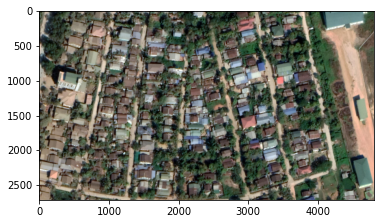

In [3]:
resize = True

scale = 0.5

if resize:
    image = ps.resize_image(image, percent = scale)
    
plt.imshow(image)

## Pad and crop image

In [4]:
model_input_w = 512
model_input_h = 512

# pad & crop
padded_image = ps.pad(image, model_input_w, model_input_h)
cropped_tiles = ps.crop(padded_image, model_input_w, model_input_h, numpy_output=True)

image width =  4812 , image height =  2712
pad width =  308 , pad height =  360


## Load model

In [5]:
model = keras.models.load_model('outputs/model weights/my_model_e100.h5')

## Inference

In [6]:
model_predictions = model.predict(cropped_tiles)

preds = np.squeeze(model_predictions)

threshold = 0.95
preds = preds > threshold

## Reconstruct final predicted image

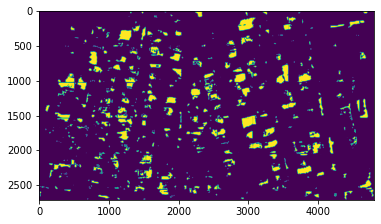

In [8]:
img_h, img_w = image.shape[:2]

predicted_image = ps.reconstruct(preds, img_w, img_h, model_input_w, model_input_h, numpy_output = False)

plt.imshow(predicted_image)

## Save image

In [3]:
# folder for saving output files by model
output_folder = 'outputs/inference outputs'

predicted_image_save_dir = f'{output_folder}/png/predicted_image.png'

# save predicted image in outpus folder
predicted_image.save(predicted_image_save_dir)